# ***Import pandas and plotting library***



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
pd.set_option("display.width",None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
from matplotlib import rcParams
from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<ipython-input-1-59fee53f1f73>:12: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('Agg', warn=False)


# ***Import Table 1***

In [2]:
#Import Table 1 (after cleaning and tidying)
data_table1 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx",sheet_name = "Table 1")
header_row = 13
data_table1.columns = data_table1.iloc[header_row]
data1=data_table1.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
data1.columns = ('Sort\\order','Major area, region, country or area of destination','Notes','Country code','Type of data (a)',"1990-International migrant stock at midyear /both sexes","1995-International migrant stock at midyear /both sexes","2000-International migrant stock at midyear /both sexes","2005-International migrant stock at midyear /both sexes","2010-International migrant stock at midyear /both sexes","2015-International migrant stock at midyear /both sexes","1990-International migrant stock at midyear /male","1995-International migrant stock at midyear /male","2000-International migrant stock at midyear /male","2005-International migrant stock at midyear /male","2010-International migrant stock at midyear /male","2015-International migrant stock at midyear /male","1990-International migrant stock at midyear /female","1995-International migrant stock at midyear /female","2000-International migrant stock at midyear /female","2005-International migrant stock at midyear /female","2010-International migrant stock at midyear /female","2015-International migrant stock at midyear /female")
data1.style.hide_index()
data1_tidy = pd.melt(frame=data1, id_vars =["Sort\order", "Major area, region, country or area of destination",'Notes', 'Country code', 'Type of data (a)'], var_name = "Years/Sexes" , value_name = "Population of International migrant stock at mid-year")
data1_tidy["Years/Sexes"].str.split("-").head
data1_tidy["Years/Sexes"].str.split("-",expand=True).head()
data1_tidy[["Years","Gender"]]=data1_tidy["Years/Sexes"].str.split("-",expand=True)
data1_tidy["Gender"].str.split("/").head()
data1_tidy["Gender"].str.split("/",expand=True).head()
data1_tidy[["International migrant stock at mid-year","Gender"]]=data1_tidy["Gender"].str.split("/",expand=True)
columns_name=list(data1_tidy.columns)
new_columns=['Sort\\order','Major area, region, country or area of destination','Notes','Country code','Type of data (a)','International migrant stock at mid-year','Years','Gender','Population of International migrant stock at mid-year','Years/Sexes']
data1_tidy=data1_tidy[new_columns]
vis1_data=data1_tidy.drop(['Sort\order','Years/Sexes','Notes','Country code','Type of data (a)','International migrant stock at mid-year'], axis=1)
vis1_data['Population of International migrant stock at mid-year'] = vis1_data['Population of International migrant stock at mid-year'].replace('..','0')
vis1_data['Population of International migrant stock at mid-year'] = vis1_data['Population of International migrant stock at mid-year'].astype(float)
print("Table 1 -  International migrant stock at mid-year by sex and by major area, region, country or area, 1990-2015")
vis1_data.head()

Table 1 -  International migrant stock at mid-year by sex and by major area, region, country or area, 1990-2015


,"Major area, region, country or area of destination",Years,Gender,Population of International migrant stock at mid-year
0,WORLD,1990,both sexes,152563212.0
1,Developed regions,1990,both sexes,82378628.0
2,Developing regions,1990,both sexes,70184584.0
3,Least developed countries,1990,both sexes,11075966.0
4,Less developed regions excluding least develop...,1990,both sexes,59105261.0


# ***Figure 1.1***

[Text(0, 0.5, 'population of international migrant'),
 Text(0.5, 0, 'Major Areas'),
 Text(0.5, 1.0, 'Compare the international migrant population of major areas(both sexes)')]

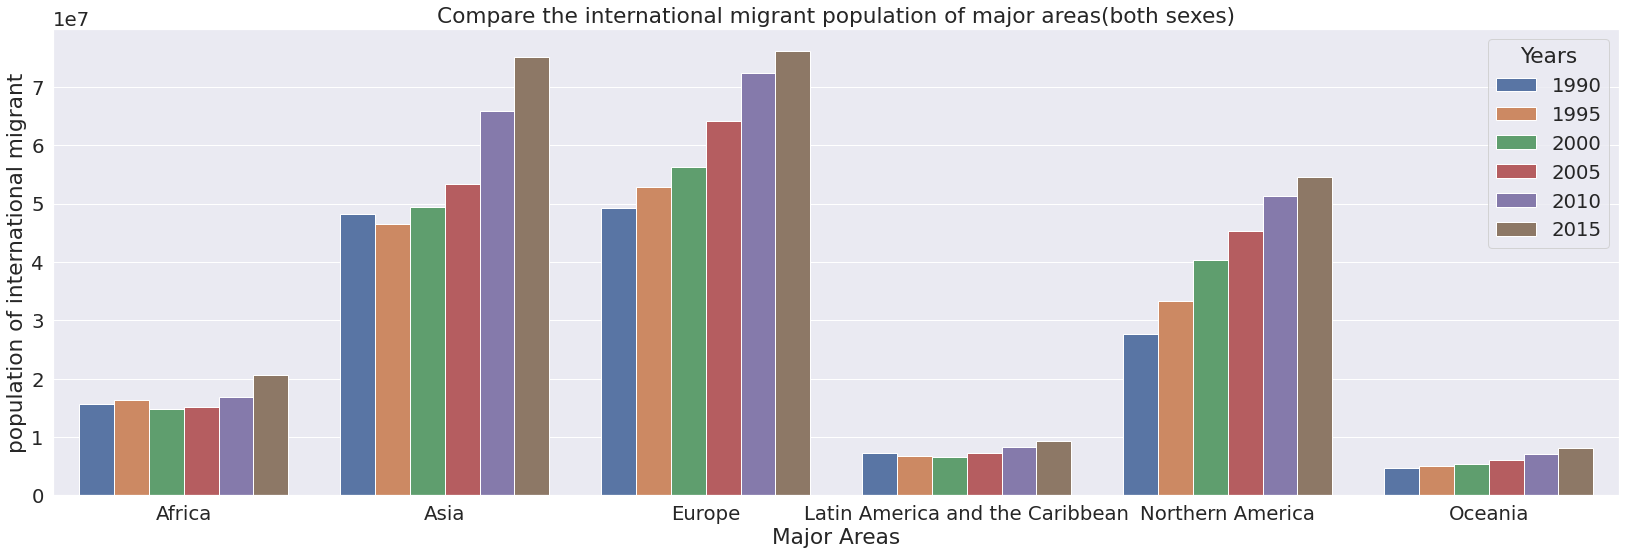

In [25]:
# create table to Compare the international migrant population of major areas(both sexes)
migrantpopulationmajor=vis1_data[vis1_data['Major area, region, country or area of destination'].isin(["Asia", "Europe", "Africa", "Oceania", "Europe", "Latin America and the Caribbean","Northern America"])]
migrantpopulationmajor1=migrantpopulationmajor[migrantpopulationmajor['Gender'].isin(["both sexes"])]
plt.figure(figsize = (25,8))
sns.set_style('darkgrid')
sns.set(font_scale=1.8)
sns.barplot(data=migrantpopulationmajor1, x="Major area, region, country or area of destination",y="Population of International migrant stock at mid-year",hue="Years").set(title='Compare the international migrant population of major areas(both sexes)',xlabel="Major Areas", ylabel="population of international migrant")

# ***Figure 1.2***

[Text(0, 0.5, 'Gender'),
 Text(0.5, 0, 'Population of International migrant stock'),
 Text(0.5, 1.0, 'Population of International migrant in North America in 2005 - Boxplot')]

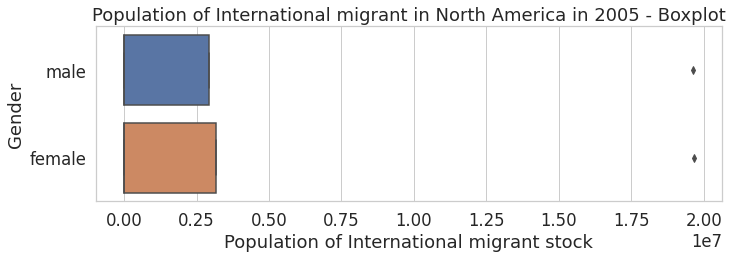

In [4]:
sns.set(font_scale=1.5)
ca=vis1_data[vis1_data['Gender'].isin(["male","female"])]
ca1=ca[ca["Major area, region, country or area of destination"].isin(["Bermuda", "Canada", "Greenland", "Saint Pierre and Miquelon", "United States of America"])]
ca2=ca1[ca1['Years'].isin(["2005"])]
sns.set_style('whitegrid') 
sns.color_palette("Set2")
plt.figure(figsize = (10,3))
sns.boxplot(data=ca2, x="Population of International migrant stock at mid-year",y= "Gender").set(title="Population of International migrant in North America in 2005 - Boxplot", xlabel="Population of International migrant stock", ylabel="Gender")

# ***Import Table 2***

In [26]:
#Import Table 2
data_table2 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx",sheet_name = "Table 2")
header_row = 13
data_table2.columns = data_table2.iloc[header_row]
data2=data_table2.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
data2.columns = ("Sort\order","Major area, region, country or area of destination","Notes","Country code","1990-Total population at midyear(thousands)/both sexes","1995-Total population at midyear(thousands)/both sexes","2000-Total population at midyear(thousands)/both sexes","2005-Total population at midyear(thousands)/both sexes","2010-Total population of at midyear(thousands)/both sexes","2015-Total population at midyear(thousands)/both sexes","1990-Total population at midyear (thousands)/male","1995-Total population at midyear (thousands)/male","2000-Total population at midyear (thousands)/male","2005-Total population at midyear (thousands)/male","2010-Total population at midyear (thousands)/male","2015-Total population at midyear (thousands)/male","1990-Total population at midyear (thousands)/female","1995-Total population at midyear (thousands)/female","2000-Total population at midyear (thousands)/female","2005-Total population at midyear (thousands)/female","2010-Total population at midyear (thousands)/female","2015-Total population at midyear (thousands)/female")
data2_tidy = pd.melt(frame=data2, id_vars =["Sort\order", "Major area, region, country or area of destination",'Notes', 'Country code'], var_name = "Years/Sexes" , value_name = "Total Population at mid-year (Thousands)")
data2_tidy["Years/Sexes"].str.split("-").head
data2_tidy["Years/Sexes"].str.split("-",expand=True).head()
data2_tidy[["Years","Gender"]]=data2_tidy["Years/Sexes"].str.split("-",expand=True)
data2_tidy["Gender"].str.split("/").head()
data2_tidy["Gender"].str.split("/",expand=True).head()
data2_tidy[["Title","Gender"]]=data2_tidy["Gender"].str.split("/",expand=True)
new_columns2=['Sort\order','Major area, region, country or area of destination','Notes','Country code','Years',"Gender",'Total Population at mid-year (Thousands)','Title','Years/Sexes']
data2_tidy=data2_tidy[new_columns2]
data2_tidy1=data2_tidy.drop(['Years/Sexes','Title','Sort\order','Notes','Country code'], axis=1)
data2_tidy1['Total Population at mid-year (Thousands)'] = data2_tidy1['Total Population at mid-year (Thousands)'].replace('..','0')
data2_tidy1['Total Population at mid-year (Thousands)'] = data2_tidy1['Total Population at mid-year (Thousands)'].astype(float)
print("Table2 - Total population at mid-year by sex and by major area, region, country or area, 1990-2015 (thousands)")
data2_tidy1.head()

Table2 - Total population at mid-year by sex and by major area, region, country or area, 1990-2015 (thousands)


,"Major area, region, country or area of destination",Years,Gender,Total Population at mid-year (Thousands)
0,WORLD,1990,both sexes,5309667.699
1,Developed regions,1990,both sexes,1144463.062
2,Developing regions,1990,both sexes,4165204.637
3,Least developed countries,1990,both sexes,510057.629
4,Less developed regions excluding least develop...,1990,both sexes,3655147.008


# ***Figure 2.1***



[Text(0, 0.5, 'Total population (thousands)'),
 Text(0.5, 0, 'East Asia Countries'),
 Text(0.5, 1.0, 'Total Population in East Asia Countries from 1990 - 2015')]

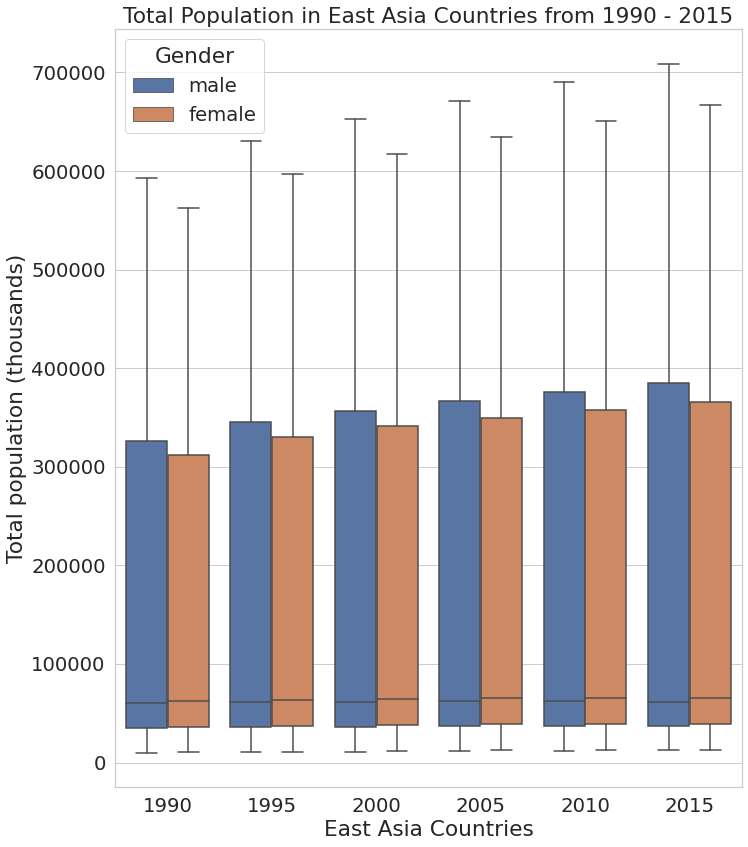

In [27]:
Eastasia=data2_tidy1[data2_tidy1['Major area, region, country or area of destination'].isin(["China", "Hong Kong Special Administrative Region China", "Macao Special Administrative Region","Democratic People's Republic of Korea","Japan","Mongolia Republic of Korea"])]
Eastasia2=Eastasia[Eastasia['Gender'].isin(['male','female'])]
sns.set_style('whitegrid') 
sns.color_palette("Set2")
plt.figure(figsize = (10,13))
sns.boxplot(data=Eastasia2, x='Years',y= "Total Population at mid-year (Thousands)",hue='Gender').set(title='Total Population in East Asia Countries from 1990 - 2015', xlabel="East Asia Countries", ylabel="Total population (thousands)")

# ***Figure 2.2***

[Text(0, 0.5, 'Total Population of Eastern Africa Countries'),
 Text(0.5, 0, 'Years'),
 Text(0.5, 1.0, 'Violin Plot for Total Population of Eastern Africa Countries from 1990-2015')]

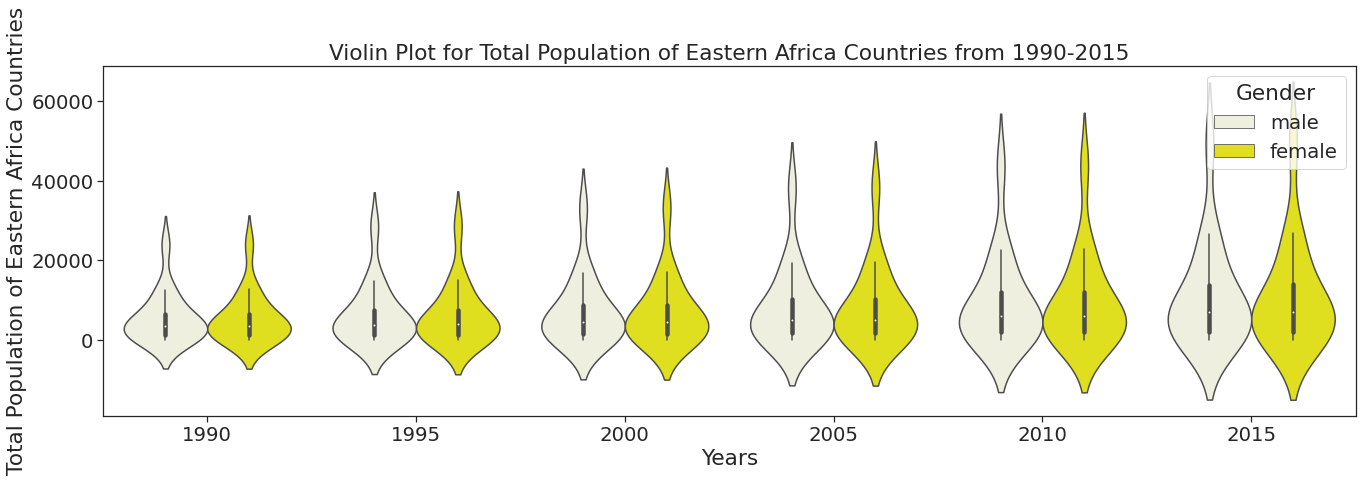

In [28]:
EA=data2_tidy1[data2_tidy1['Major area, region, country or area of destination'].isin(["Burundi", "Comoros","Djibouti", "Eritrea" ,"Ethiopia", "Kenya", "Madagascar", "Malawi", "Mauritius", "Mayotte", "Mozambique Réunion Rwanda Seychelles,", "Somalia", "South Sudan","Uganda", "United Republic of Tanzania" ,"Zambia","Zimbabwe"])]
EA=EA[EA['Gender'].isin(['female','male'])]
EA
sns.set(rc={'figure.figsize':(20,6)})
sns.set(font_scale=1.8)
sns.set_style('ticks') 
sns.violinplot(x='Years', y='Total Population at mid-year (Thousands)',hue="Gender", data=EA, color="yellow",scale="count").set(title='Violin Plot for Total Population of Eastern Africa Countries from 1990-2015',xlabel="Years", ylabel="Total Population of Eastern Africa Countries")


# ***Import Table 3***

In [53]:
#Import Table 3
data_table3 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx",sheet_name = "Table 3")
header_row = 13
data_table3.columns = data_table3.iloc[header_row]
data3=data_table3.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
data3.columns = ("Sort\order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)","1990-International migrant stock as a percentage of the total population /both sexes","1995-International migrant stock as a percentage of the total population /both sexes","2000-International migrant stock as a percentage of the total population /both sexes","2005-International migrant stock as a percentage of the total population /both sexes","2010-International migrant stock as a percentage of the total population /both sexes","2015-International migrant stock as a percentage of the total population /both sexes","1990-International migrant stock as a percentage of the total population /male","1995-International migrant stock as a percentage of the total population /male","2000-International migrant stock as a percentage of the total population /male","2005-International migrant stock as a percentage of the total population /male","2010-International migrant stock as a percentage of the total population /male","2015-International migrant stock as a percentage of the total population /male","1990-International migrant stock as a percentage of the total population /female","1995-International migrant stock as a percentage of the total population /female","2000-International migrant stock as a percentage of the total population /female","2005-International migrant stock as a percentage of the total population /female","2010-International migrant stock as a percentage of the total population /female","2015-International migrant stock as a percentage of the total population /female")
data3_tidy=data3.melt(id_vars = ["Sort\order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)"],var_name = "Years/Sexes", value_name= "International migrant stock as a percentage of the total population")
data3_tidy["Years/Sexes"].str.split("-").head
data3_tidy["Years/Sexes"].str.split("-",expand=True).head()
data3_tidy[["Years","Gender"]]=data3_tidy["Years/Sexes"].str.split("-",expand=True)
data3_tidy.head()
data3_tidy["Gender"].str.split("/").head()
data3_tidy["Gender"].str.split("/",expand=True).head()
data3_tidy[["title","Gender"]]=data3_tidy["Gender"].str.split("/",expand=True)
data3_tidy.head()
columns_name3=list(data3_tidy.columns)
columns_name3
new_columns3=['Sort\\order','Major area, region, country or area of destination','Notes','Country code','Type of data (a)','Years','Gender','International migrant stock as a percentage of the total population','Years/Sexes',"title"]
data3_tidy=data3_tidy[new_columns3]
data3_tidy.head()
data3_tidy1=data3_tidy.drop(['Sort\order','Years/Sexes','Notes','title','Country code','Type of data (a)'], axis=1)
data3_tidy1['International migrant stock as a percentage of the total population'] = data3_tidy1['International migrant stock as a percentage of the total population'].replace('..','0')
data3_tidy1['International migrant stock as a percentage of the total population'] = data3_tidy1['International migrant stock as a percentage of the total population'].astype(float)
print("International migrant stock as a percentage of the total population")
data3_tidy1.head()

International migrant stock as a percentage of the total population


,"Major area, region, country or area of destination",Years,Gender,International migrant stock as a percentage of the total population
0,WORLD,1990,both sexes,2.873310
1,Developed regions,1990,both sexes,7.198015
2,Developing regions,1990,both sexes,1.685021
3,Least developed countries,1990,both sexes,2.171513
4,Less developed regions excluding least develop...,1990,both sexes,1.617042


# ***Figure 3.1***




[Text(0, 0.5, 'international migrant stock percentage of the total population'),
 Text(0.5, 0, 'Major Areas'),
 Text(0.5, 1.0, 'Compare the migrant stock percentage of middle Africa countries (both sexes)')]

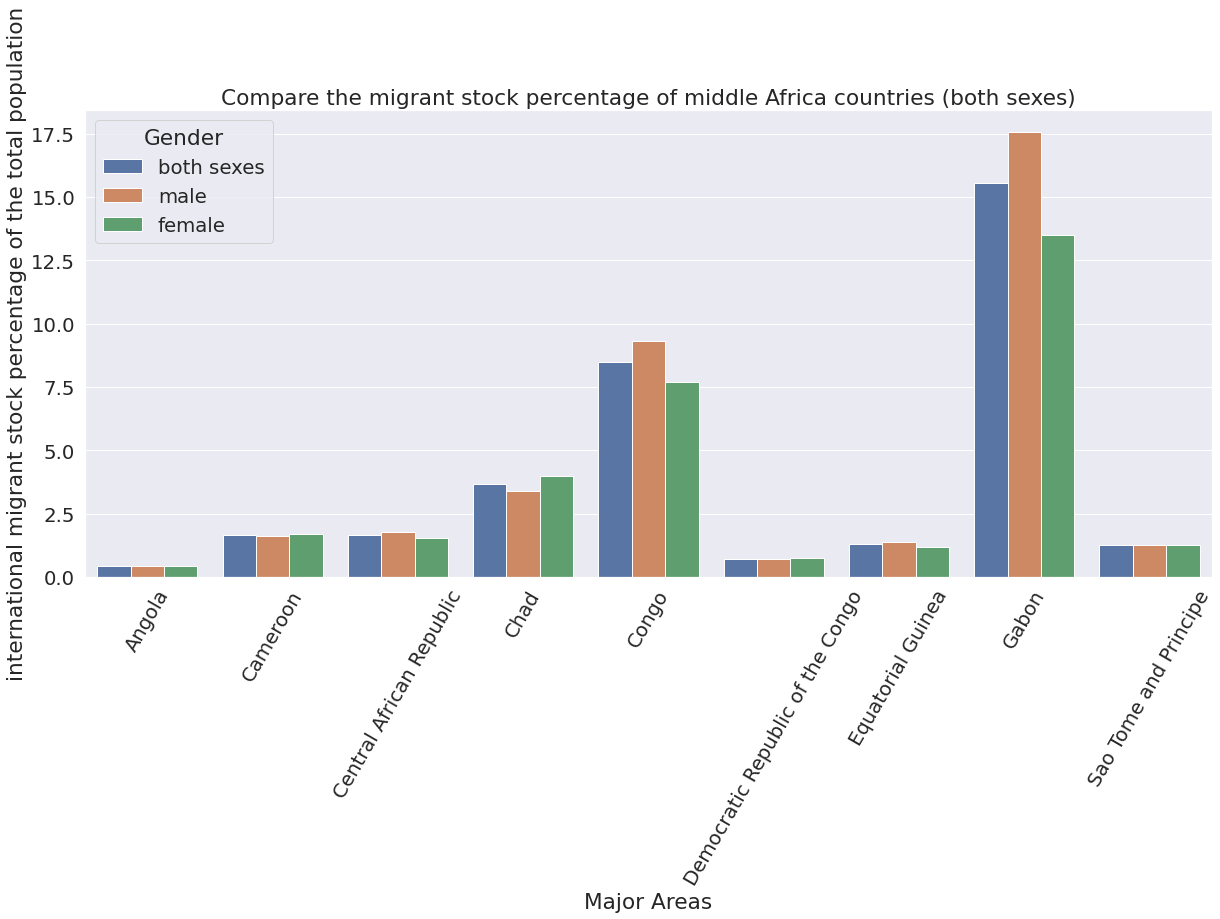

In [54]:
MA=data3_tidy1[data3_tidy1['Major area, region, country or area of destination'].isin(["Angola","Cameroon",'Central African Republic','Chad', 'Congo','Democratic Republic of the Congo',"Equatorial Guinea","Gabon","Sao Tome and Principe"])]
MA1=MA[MA['Years'].isin(["2015"])]
plt.figure(figsize = (18,8))
sns.set_style('darkgrid')
sns.set(font_scale=1.8)
plt.xticks(rotation=60)
sns.barplot(data=MA1, x="Major area, region, country or area of destination",y="International migrant stock as a percentage of the total population",hue="Gender").set(title='Compare the migrant stock percentage of middle Africa countries (both sexes)',xlabel="Major Areas", ylabel="international migrant stock percentage of the total population")

# ***Figure 3.2***

In [55]:
MMA=data3_tidy1[data3_tidy1['Major area, region, country or area of destination'].isin(["Angola","Cameroon",'Central African Republic','Chad', 'Congo','Democratic Republic of the Congo',"Equatorial Guinea","Gabon","Sao Tome and Principe"])]
MMA1=MA[MA['Gender'].isin(["boths"])]

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


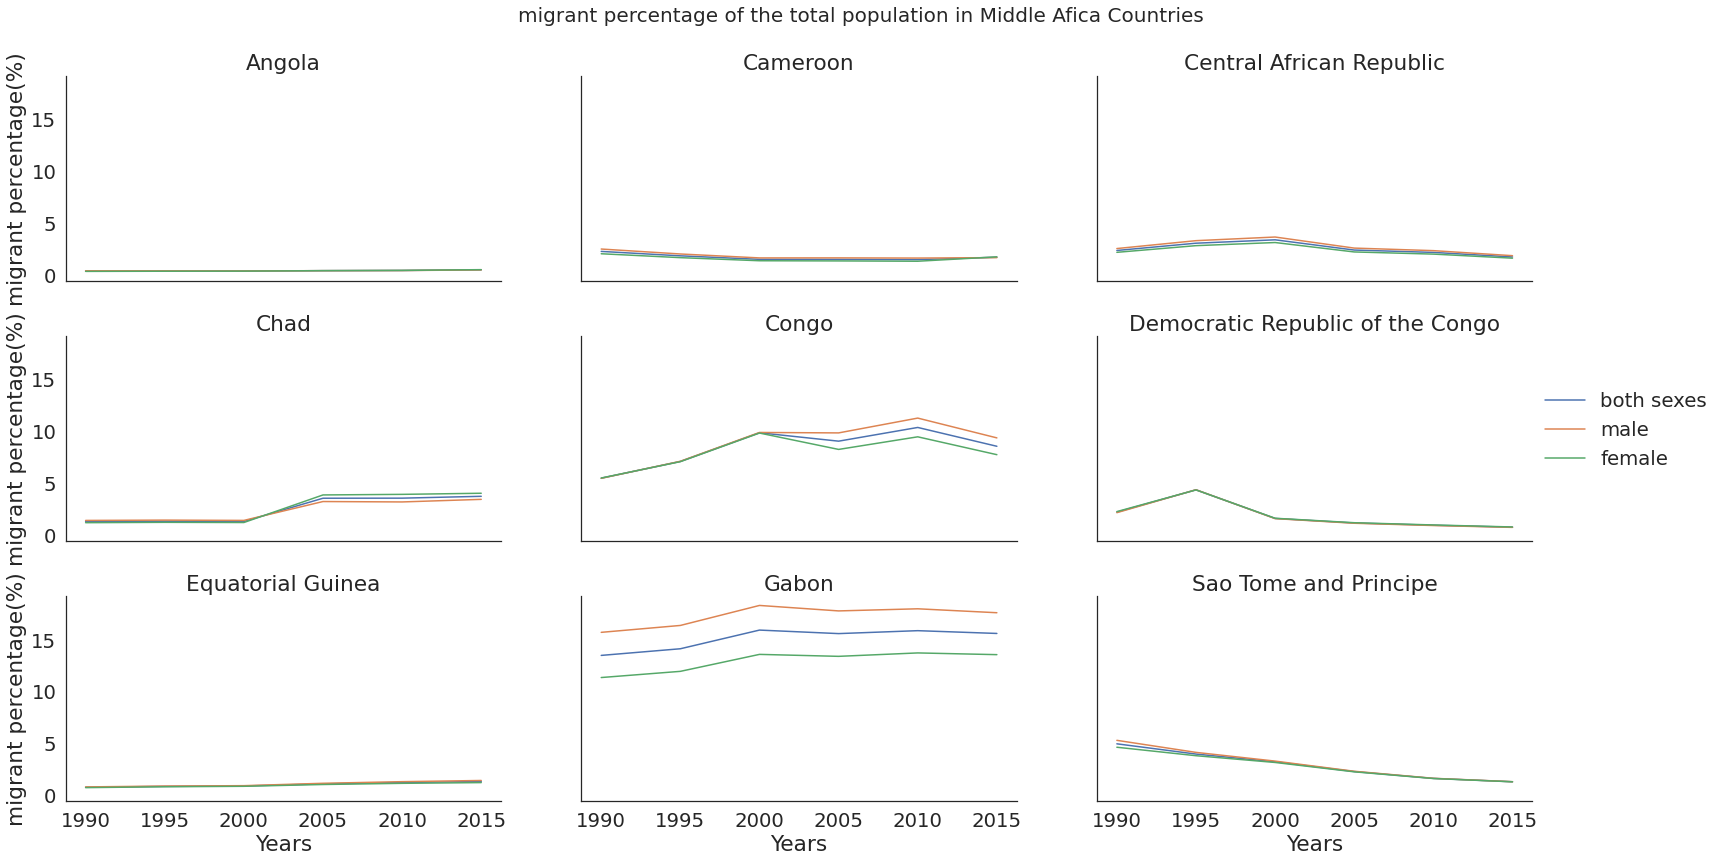

In [59]:
sns.set_style('white')
g= sns.FacetGrid(MMA,col="Major area, region, country or area of destination", sharey=True,col_wrap=3, height=4, aspect=1.8)
g.map_dataframe(sns.lineplot, x="Years", y="International migrant stock as a percentage of the total population",hue="Gender");
g.set_axis_labels(x_var="Years", y_var="migrant percentage(%)")
g.set_titles(col_template="{col_name}");
g.add_legend();
g.fig.suptitle('migrant percentage of the total population in Middle Afica Countries',fontsize=20)
g.fig.subplots_adjust(top=.9)

In [ ]:
g.set_axis_labels(x_var="Years", y_var="migrant percentage")
g.set_titles(col_template="{col_name}");
g.add_legend();

# ***Import Table 4***

In [36]:
#Import Table 4
data_table4 = pd.read_excel("//content/UN_MigrantStockTotal_2015.xlsx",sheet_name = "Table 4")
data_table4.head()
header_row = 13
data_table4.columns = data_table4.iloc[header_row]
data4=data_table4.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
data4.columns = ("Sort\order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)","1990-Female migrants as a percentage of the international migrant stock","1995-Female migrants as a percentage of the international migrant stock","2000-Female migrants as a percentage of the international migrant stock","2005-Female migrants as a percentage of the international migrant stock","2010-Female migrants as a percentage of the international migrant stock","2015-Female migrants as a percentage of the international migrant stock")
data4.style.hide_index()
data4_tidy=data4.melt(id_vars = ["Sort\order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)"],var_name = "Years/Sexes", value_name= "Female migrants as a percentage of the international migrant stock from 1990-2015")
data4_tidy["Years/Sexes"].str.split("-").head
data4_tidy["Years/Sexes"].str.split("-",expand=True).head()
data4_tidy[["Years","Gender"]]=data4_tidy["Years/Sexes"].str.split("-",expand=True)
columns_name4=list(data4_tidy.columns)
columns_name4
new_columns4=['Sort\order','Major area, region, country or area of destination','Notes','Country code','Type of data (a)','Years','Female migrants as a percentage of the international migrant stock from 1990-2015',"Gender","Years/Sexes"]
data4_tidy=data4_tidy[new_columns4]
data4_tidy1=data4_tidy.drop(['Country code','Years/Sexes','Gender','Sort\order','Notes','Type of data (a)'], axis=1)
data4_tidy1['Female migrants as a percentage of the international migrant stock from 1990-2015'] = data4_tidy1['Female migrants as a percentage of the international migrant stock from 1990-2015'].replace('..','0')
data4_tidy1['Female migrants as a percentage of the international migrant stock from 1990-2015'] = data4_tidy1['Female migrants as a percentage of the international migrant stock from 1990-2015'].astype(float)
print("Table 4 - Female migrants as a percentage of the international migrant stock by major area, region, country or area, 1990-2015")
data4_tidy1.head()

Table 4 - Female migrants as a percentage of the international migrant stock by major area, region, country or area, 1990-2015


,"Major area, region, country or area of destination",Years,Female migrants as a percentage of the international migrant stock from 1990-2015
0,WORLD,1990,49.039150
1,Developed regions,1990,51.123977
2,Developing regions,1990,46.592099
3,Least developed countries,1990,47.261155
4,Less developed regions excluding least develop...,1990,46.466684


# ***Figure 4.1***

[Text(0, 0.5, 'Female migrants as a percentage of the international migrant stock'),
 Text(0.5, 0, 'Years'),
 Text(0.5, 1.0, 'Compare the migrant stock percntage of middle Africa countries (both sexes)')]

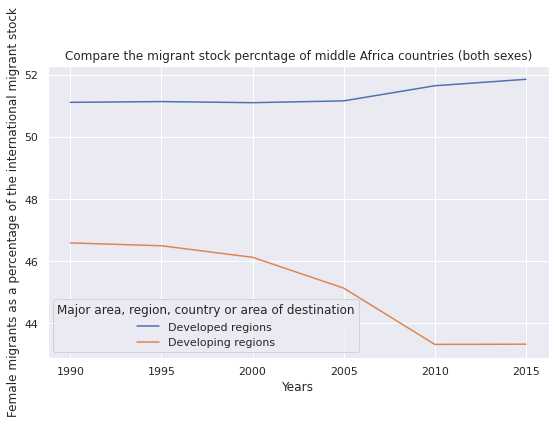

In [37]:
DEVREGION=data4_tidy1[data4_tidy1['Major area, region, country or area of destination'].isin(["Developed regions", "Developing regions"])]
sns.set(font_scale=1)
plt.figure(figsize = (8,5))
sns.set_style('darkgrid')
sns.lineplot(data=DEVREGION, x="Years",y="Female migrants as a percentage of the international migrant stock from 1990-2015",hue="Major area, region, country or area of destination").set(title='Compare the migrant stock percntage of middle Africa countries (both sexes)',xlabel="Years", ylabel="Female migrants as a percentage of the international migrant stock")

# ***Import Table 5***

In [38]:
#Import Table 5
data_table5 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx",sheet_name = "Table 5")
data_table5.head()
header_row = 13
data_table5.columns = data_table5.iloc[header_row]
data5=data_table5.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
data5.columns = ("Sort\order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)","1990~1995-Annual rate of change of the migrant stock/both sexes","1995~2000-Annual rate of change of the migrant stock /both sexes","2000~2005-Annual rate of change of the migrant stock /both sexes","2005~2010-Annual rate of change of the migrant stock /both sexes","2010~2015-Annual rate of change of the migrant stock /both sexes","1990~1995-Annual rate of change of the migrant stock /male","1995~2000-Annual rate of change of the migrant stock /male","2000~2005-Annual rate of change of the migrant stock /male","2005~2010-Annual rate of change of the migrant stock /male","2010~2015-Annual rate of change of the migrant stock /male","1990~1995-Annual rate of change of the migrant stock /female","1995~2000-Annual rate of change of the migrant stock /female","2000~2005-Annual rate of change of the migrant stock /female","2005~2010-Annual rate of change of the migrant stock /female","2010~2015-Annual rate of change of the migrant stock /female")
data5_tidy=data5.melt(id_vars = ["Sort\order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)"],var_name = "Years/Sexes", value_name= "Annual rate of change of the migrant stock")
data5_tidy.head()
columns_name5=list(data5_tidy.columns)
columns_name5
data5_tidy["Years/Sexes"].str.split("-").head
data5_tidy["Years/Sexes"].str.split("-",expand=True).head()
data5_tidy[["Years","Gender"]]=data5_tidy["Years/Sexes"].str.split("-",expand=True)
data5_tidy.head()
data5_tidy["Gender"].str.split("/").head()
data5_tidy["Gender"].str.split("/",expand=True).head()
data5_tidy[["title","Gender"]]=data5_tidy["Gender"].str.split("/",expand=True)
new_columns5=['Sort\order','Major area, region, country or area of destination','Notes','Country code','Type of data (a)','Years',"Gender",'Annual rate of change of the migrant stock',"Years/Sexes"]
data5_tidy=data5_tidy[new_columns5]
data5_tidy1=data5_tidy.drop(['Years/Sexes',	'Sort\order','Notes','Country code','Type of data (a)'], axis=1)
data5_tidy1['Annual rate of change of the migrant stock'] = data5_tidy1['Annual rate of change of the migrant stock'].replace('..','0')
data5_tidy1['Annual rate of change of the migrant stock'] = data5_tidy1['Annual rate of change of the migrant stock'].astype(float)
print("Table 5 - Table 5 - Annual rate of change of the migrant stock by sex and by major area, region, country or area, 1990-2015 (percentage)")
data5_tidy1.head()

Table 5 - Table 5 - Annual rate of change of the migrant stock by sex and by major area, region, country or area, 1990-2015 (percentage)


,"Major area, region, country or area of destination",Years,Gender,Annual rate of change of the migrant stock
0,WORLD,1990~1995,both sexes,1.051865
1,Developed regions,1990~1995,both sexes,2.275847
2,Developing regions,1990~1995,both sexes,-0.487389
3,Least developed countries,1990~1995,both sexes,1.118175
4,Less developed regions excluding least develop...,1990~1995,both sexes,-0.803244


# ***Figure 5.1***

<ipython-input-39-eb56308f10e6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  annual3=annual2[data5_tidy1['Gender'].isin(["both sexes"])]


[Text(0, 0.5, 'Asian Countries'),
 Text(0.5, 0, 'Annual rate of change of the migrant stock (percent)'),
 Text(0.5, 1.0, 'Annual rate of change of the migrant stock in Asian countries from 2010 to 2015 (both sexes)')]

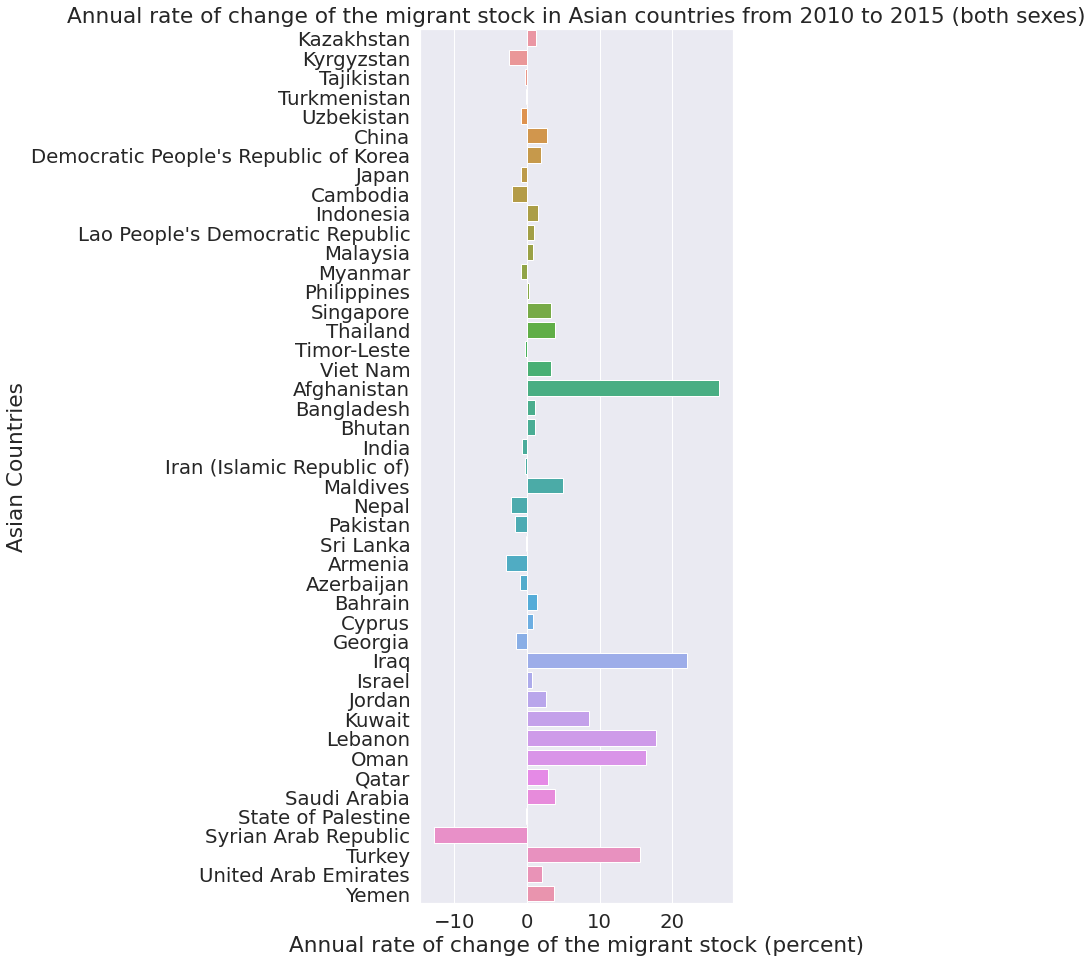

In [39]:
# create table to Compare the international migrant population of major areas(both sexes)
annual=data5_tidy1[data5_tidy1['Major area, region, country or area of destination'].isin(["Kazakhstan","Kyrgyzstan","Tajikistan","Turkmenistan","Uzbekistan","Brunei", "Darussalam", "Cambodia","Indonesia", "Lao People's Democratic Republic", "Malaysia", "Myanmar", "Philippines", "Singapore" ,"Thailand" ,"Timor-Leste", "Viet Nam","Afghanistan", "Bangladesh", "Bhutan", "India", "Iran (Islamic Republic of)", "Maldives", "Nepal", "Pakistan", "Sri Lanka","Armenia", "Azerbaijan", "Bahrain", "Cyprus", "Georgia", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Qatar","Saudi Arabia" ,"State of Palestine" ,"Syrian Arab Republic" ,"Turkey","United Arab Emirates","Yemen","China", "Hong Kong Special Administrative Region China", "Macao Special Administrative Region","Democratic People's Republic of Korea","Japan","Mongolia Republic of Korea"])]
annual2=annual[annual['Years'].isin(["2010~2015"])]
annual3=annual2[data5_tidy1['Gender'].isin(["both sexes"])]
plt.figure(figsize = (5,15))
sns.set_style('darkgrid')
sns.set(font_scale=1.8)
sns.barplot(data=annual3, x="Annual rate of change of the migrant stock", y= "Major area, region, country or area of destination").set(title="Annual rate of change of the migrant stock in Asian countries from 2010 to 2015 (both sexes)",xlabel="Annual rate of change of the migrant stock (percent)", ylabel="Asian Countries")

# ***Import Table 6-1*** 

In [40]:
#Import Tbale 6 into python environment
print("Estimated refugee stock at midyear for both gender")
data_table6 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx",sheet_name = "Table 6")
header_row = 13
data_table6.columns = data_table6.iloc[header_row]
data6=data_table6.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
data6.columns = ("Sort\order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)","1990-Estimated refugee stock at midyear /both sexes","1995-Estimated refugee stock at midyear /both sexes","2000-Estimated refugee stock at midyear /both sexes","2005-Estimated refugee stock at midyear /both sexes","2010-Estimated refugee stock at midyear /both sexes","2015-Estimated refugee stock at midyear /both sexes","1990-Refugees as a percentage of the international migrant stock","1995-Refugees as a percentage of the international migrant stock","2000-Refugees as a percentage of the international migrant stock","2005-Refugees as a percentage of the international migrant stock","2010-Refugees as a percentage of the international migrant stock","2015-Refugees as a percentage of the international migrant stock","1990-1995/Annual rate of change of the refugee stock","1995-2000/Annual rate of change of the refugee stock","2000-2005/Annual rate of change of the refugee stock","2005-2010/Annual rate of change of the refugee stock","2010-2015/Annual rate of change of the refugee stock")
data6_estrefugee=data6.loc[:,("Sort\order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)","1990-Estimated refugee stock at midyear /both sexes","1995-Estimated refugee stock at midyear /both sexes","2000-Estimated refugee stock at midyear /both sexes","2005-Estimated refugee stock at midyear /both sexes","2010-Estimated refugee stock at midyear /both sexes","2015-Estimated refugee stock at midyear /both sexes")]
data6_estrefugeetidy = pd.melt(frame=data6_estrefugee, id_vars =["Sort\order", "Major area, region, country or area of destination",'Notes', 'Country code', 'Type of data (a)'], var_name = "Years/Sexes" , value_name = "Estimated refugee stock at midyear for both gender")
data6_estrefugeetidy["Years/Sexes"].str.split("-").head
data6_estrefugeetidy["Years/Sexes"].str.split("-",expand=True).head()
data6_estrefugeetidy[["Years","Gender"]]=data6_estrefugeetidy["Years/Sexes"].str.split("-",expand=True)
data6_estrefugeetidy["Gender"].str.split("/").head()
data6_estrefugeetidy[["Estimated refugee stock at mid-year for both gender","Gender"]]= data6_estrefugeetidy["Gender"].str.split("/", expand=True)
columns_name6_1=list(data6_estrefugeetidy.columns)
columns_name6_1
new_columns6_1=['Sort\order','Major area, region, country or area of destination','Notes','Country code','Type of data (a)','Years','Gender','Estimated refugee stock at midyear for both gender','Years/Sexes']
data6_estrefugeetidy=data6_estrefugeetidy[new_columns6_1]
data6_estrefugeetidy1=data6_estrefugeetidy.drop([	"Sort\order","Years/Sexes","Gender","Notes","Country code","Type of data (a)"], axis=1)
data6_estrefugeetidy1.head()

Estimated refugee stock at midyear for both gender


,"Major area, region, country or area of destination",Years,Estimated refugee stock at midyear for both gender
0,WORLD,1990,18836571
1,Developed regions,1990,2014564
2,Developing regions,1990,16822007
3,Least developed countries,1990,5048391
4,Less developed regions excluding least develop...,1990,11773616


# ***Figure 6.1***


[Text(0, 0.5, 'Estimated refugee stock at midyear'),
 Text(0.5, 0, 'Years'),
 Text(0.5, 1.0, 'Estimated refugee stock at midyear in Southern Africa')]

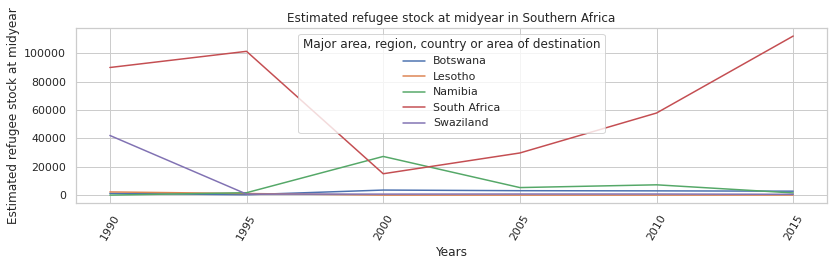

In [41]:
SA=data6_estrefugeetidy1[data6_estrefugeetidy1['Major area, region, country or area of destination'].isin(["Botswana", "Lesotho", "Namibia", "South Africa" ,"Swaziland"])]
sns.set(font_scale=1)
plt.figure(figsize = (12,3))
sns.set_style("whitegrid")
plt.xticks(rotation=60)
sns.lineplot(data=SA, x="Years", y="Estimated refugee stock at midyear for both gender", hue="Major area, region, country or area of destination").set(title='Estimated refugee stock at midyear in Southern Africa',xlabel="Years", ylabel="Estimated refugee stock at midyear")

# ***Import Table 6-2***

In [42]:
# the second part of table 6 - ""Refugees as a percentage of the international migrant stock"
print("Refugees as a percentage of the international migrant stock")
data6_refugeepercent=data6.loc[:,("Sort\order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)","1990-Refugees as a percentage of the international migrant stock",	"1995-Refugees as a percentage of the international migrant stock","2000-Refugees as a percentage of the international migrant stock","2005-Refugees as a percentage of the international migrant stock","2010-Refugees as a percentage of the international migrant stock","2015-Refugees as a percentage of the international migrant stock")]
data6_refugeepercent.head()
# tidy the dataframe - "Refugees as a percentage of the international migrant stock"
data6_refugeepercent = pd.melt(frame=data6_refugeepercent, id_vars =["Sort\order", "Major area, region, country or area of destination",'Notes', 'Country code', 'Type of data (a)'], var_name = "Years/Title" , value_name = "Refugees as a percentage of the international migrant stock")
#clear up the columns name to ensure that each columns only contain a variable
data6_refugeepercent["Years/Title"].str.split("-").head
data6_refugeepercent["Years/Title"].str.split("-",expand=True).head()
data6_refugeepercent[["Years","Titlle"]]=data6_refugeepercent["Years/Title"].str.split("-",expand=True)
columns_name6_2=list(data6_refugeepercent.columns)
columns_name6_2
new_columns6_2=['Sort\\order','Major area, region, country or area of destination','Notes','Country code','Type of data (a)',"Years",'Refugees as a percentage of the international migrant stock','Years/Title',"Titlle"]
data6_refugeepercenttidy=data6_refugeepercent[new_columns6_2]
data6_refugeepercenttidy1=data6_refugeepercenttidy.drop(['Sort\order','Years/Title',"Titlle",'Notes','Country code','Type of data (a)'], axis=1)
data6_refugeepercenttidy1.head()

Refugees as a percentage of the international migrant stock


,"Major area, region, country or area of destination",Years,Refugees as a percentage of the international migrant stock
0,WORLD,1990,12.346732
1,Developed regions,1990,2.445494
2,Developing regions,1990,23.968236
3,Least developed countries,1990,45.56588
4,Less developed regions excluding least develop...,1990,19.919743


# ***Figure 6.2***

[Text(0, 0.5, 'Refugees Percentage of international migrant stock'),
 Text(0.5, 0, 'East Europe Countries'),
 Text(0.5, 1.0, 'Refugees as a percentage of the international migrant stock in Eastern Europe Countries')]

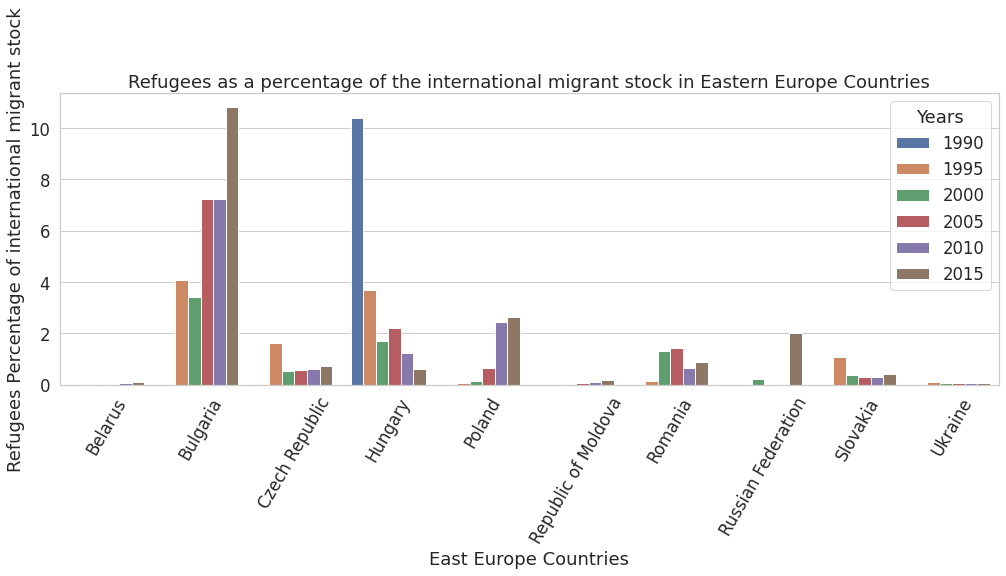

In [43]:
EE=data6_refugeepercenttidy1[data6_refugeepercenttidy1['Major area, region, country or area of destination'].isin(["Belarus", "Bulgaria", "Czech Republic", "Hungary", "Poland", "Republic of Moldova", "Romania", "Russian Federation", "Slovakia", "Ukraine"])]
sns.set(font_scale=1.5)
plt.figure(figsize = (15,5))
sns.set_style("whitegrid")
plt.xticks(rotation=60)
sns.barplot(data=EE, x="Major area, region, country or area of destination", y="Refugees as a percentage of the international migrant stock",hue="Years").set(title="Refugees as a percentage of the international migrant stock in Eastern Europe Countries", xlabel="East Europe Countries",ylabel="Refugees Percentage of international migrant stock" )

# ***Import Table 6-3***

In [44]:
# the second part of table 6 - "Annual rate of change of the refugee stock from 1990-2015"
data6_annualratechange=data6.loc[:,("Sort\order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)","1990-1995/Annual rate of change of the refugee stock","1995-2000/Annual rate of change of the refugee stock","2000-2005/Annual rate of change of the refugee stock","2005-2010/Annual rate of change of the refugee stock","2010-2015/Annual rate of change of the refugee stock")]
print("Annual rate of change of the refugee stock from 1990-2015")
data6_annualratechange = pd.melt(frame=data6_annualratechange, id_vars =["Sort\order", "Major area, region, country or area of destination",'Notes', 'Country code', 'Type of data (a)'], var_name = "Years/Title" , value_name = "Annual rate of change of the refugee stock from 1990-2015")
data6_annualratechange["Years/Title"].str.split("/").head
data6_annualratechange["Years/Title"].str.split("/",expand=True).head()
data6_annualratechange[["Years","Title"]]=data6_annualratechange["Years/Title"].str.split("/",expand=True)
columns_name6_3=list(data6_annualratechange.columns)
columns_name6_3
new_columns6_3=['Sort\\order','Major area, region, country or area of destination','Notes','Country code','Type of data (a)',"Years","Annual rate of change of the refugee stock from 1990-2015",'Years/Title',"Title"]
data6_annualratechange=data6_annualratechange[new_columns6_3]
data6_annualratechangetidy1=data6_annualratechange.drop(['Sort\order','Years/Title',"Title",'Notes',"Country code", "Type of data (a)"], axis=1)
data6_annualratechangetidy1.head()

Annual rate of change of the refugee stock from 1990-2015


,"Major area, region, country or area of destination",Years,Annual rate of change of the refugee stock from 1990-2015
0,WORLD,1990-1995,-2.123497
1,Developed regions,1990-1995,9.388424
2,Developing regions,1990-1995,-2.839417
3,Least developed countries,1990-1995,-0.680327
4,Less developed regions excluding least develop...,1990-1995,-4.3836


# ***Figure 6.3***

[Text(0, 0.5, 'Annual rate of change of the refugee stock'),
 Text(0.5, 0, 'Years'),
 Text(0.5, 1.0, 'Annual rate of change of the refugee in Major Areas')]

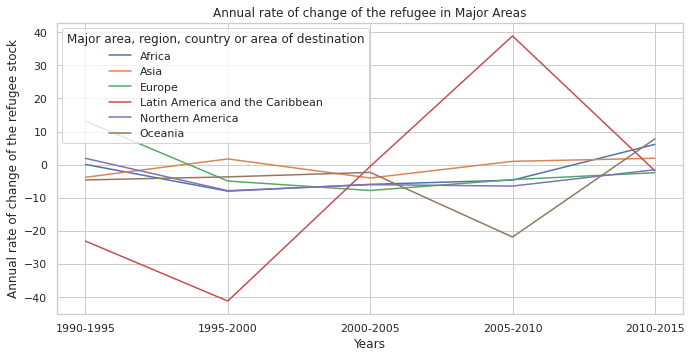

In [45]:
MAJ=data6_annualratechangetidy1[data6_annualratechangetidy1['Major area, region, country or area of destination'].isin(["Africa","Oceania","Latin America and the Caribbean","Europe","Asia","Northern America"])]
sns.set(font_scale=1)
plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
sns.lineplot(data=MAJ, x= "Years" ,y="Annual rate of change of the refugee stock from 1990-2015",hue='Major area, region, country or area of destination').set(title='Annual rate of change of the refugee in Major Areas',xlabel="Years", ylabel="Annual rate of change of the refugee stock")